In [2]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


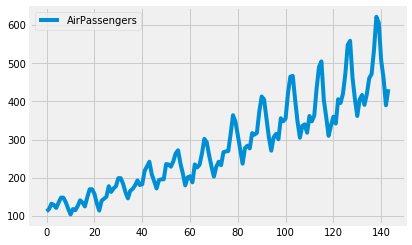

In [4]:
df.plot()
plt.show()

In [5]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [6]:
df["Month"] = pd.DatetimeIndex(df["Month"])

In [7]:
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [8]:
df = df.rename(columns={"Month":"ds", "AirPassengers":"y"})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


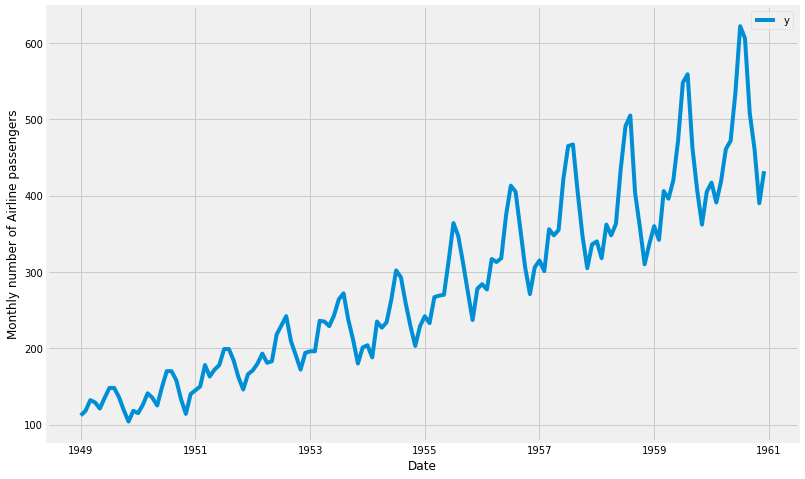

In [9]:
ax = df.set_index("ds").plot(figsize=(12,8))
ax.set_ylabel("Monthly number of Airline passengers")
ax.set_xlabel("Date")
plt.show()

In [10]:
my_model = Prophet(interval_width=0.95)

In [11]:
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future_dates = my_model.make_future_dataframe(periods = 12, freq = "MS")
future_dates.tail()

,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


In [13]:
forecast = my_model.predict(future_dates)
forecast[["ds","yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
151,1961-08-01,577.110838,535.402925,621.434774
152,1961-09-01,528.558021,484.176842,568.603892
153,1961-10-01,493.387985,446.663385,535.743472
154,1961-11-01,459.551557,415.535409,504.143084
155,1961-12-01,488.931173,445.879524,532.229929


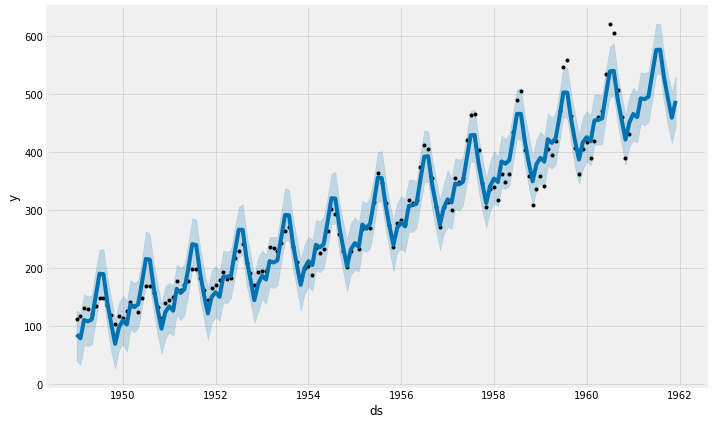

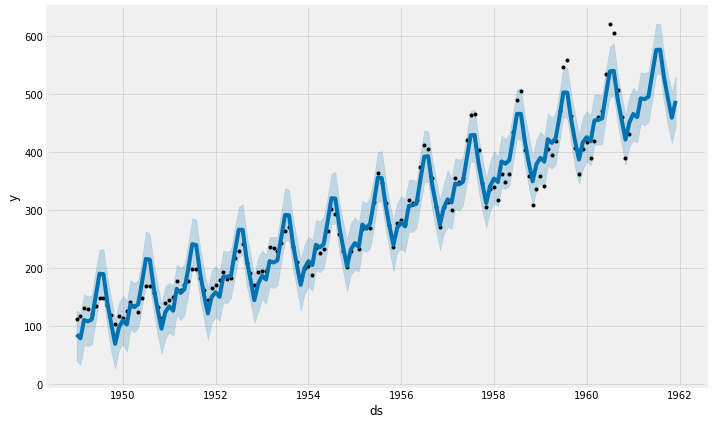

In [16]:
my_model.plot(forecast, uncertainty=True)

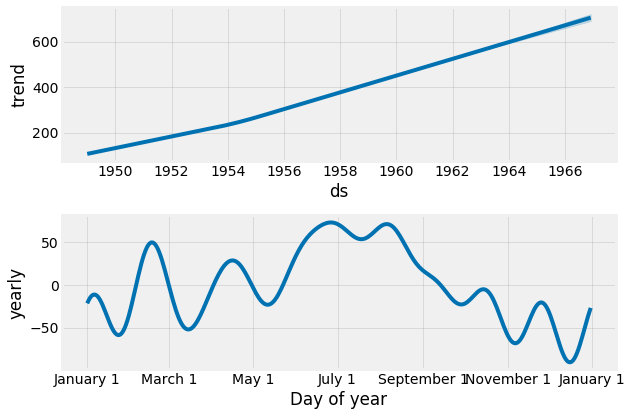

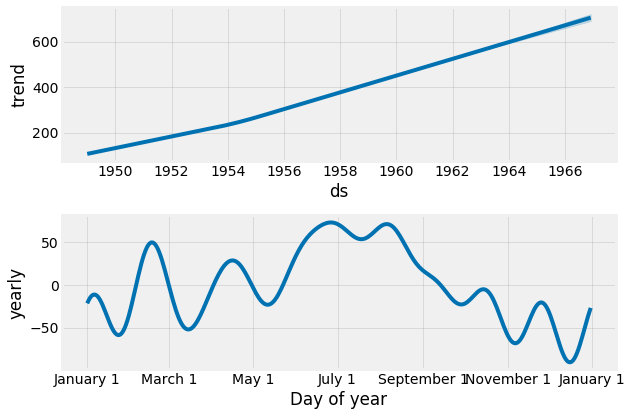

In [34]:
my_model.plot_components(forecast)

In [30]:
forecast[["ds", "yhat"]]

,ds,yhat
0,1949-01-01,85.667868
1,1949-02-01,79.176553
2,1949-03-01,110.839332
3,1949-04-01,108.472210
4,1949-05-01,111.854130
5,1949-06-01,151.929738
6,1949-07-01,190.550075
7,1949-08-01,189.984380
8,1949-09-01,140.463171
9,1949-10-01,104.355981
